In [175]:
import pandas as pd
import re
import nltk
from pycorenlp import *
import collections
from nltk import tokenize
import time
import networkx as nx
import matplotlib.pyplot as plt

In [176]:
df = pd.read_csv('C:/Users/Vivian/Desktop/df_dec.csv')

In [177]:
def preprocess_content(column):
    column = column.apply(lambda x: re.sub(r'SINGAPORE – ','',x, flags=re.IGNORECASE))
    column = column.apply(lambda x: re.sub(r'singapore - ','',x, flags=re.IGNORECASE))
    #column = column.apply(lambda x: re.sub(r'st photo','',x, flags=re.IGNORECASE))
    #column = column.apply(lambda x: re.sub(r'facebook post','',x, flags=re.IGNORECASE))
    #column = column.apply(lambda x: re.sub(r'years ago','',x, flags=re.IGNORECASE))
    #column = column.apply(lambda x: re.sub(r'[^a-zA-z\s]', ' ', x)) #removing digits and special characters (punctuations)
    #column = column.apply(lambda x: x.lower()) #convert to lowercase
    column = column.apply(lambda x: re.sub('\n','',x))
    return column

df['Article Content'] = preprocess_content(df['Article Content'])

# Getting Relations Using StanfordCoreNLP

In [178]:
nlp = StanfordCoreNLP("http://localhost:9000/")

In [183]:
st = time.time()
output_strict_coref = df['Article Content'].apply(lambda x: nlp.annotate(x, properties={"timeout":"500000","annotators":"tokenize,ssplit,pos,lemma,parse,ner,coref,openie", "outputFormat":"json","openie.triple.strict":"true","openie.resolve_coref":"true","openie.max_entailments_per_clause":"2","openie.splitter.disable":"false"}))
print(time.time()-st)

18501.620231866837


In [189]:
st = time.time()
output_strict_coref_nomax = df['Article Content'].apply(lambda x: nlp.annotate(x, properties={"annotators":"tokenize,ssplit,pos,lemma,parse,ner,coref,openie", "outputFormat":"json","openie.triple.strict":"true","openie.resolve_coref":"true","openie.splitter.disable":"false"}))
print(time.time()-st)

24981.74487400055


In [389]:
result = []
op = output_strict_coref

for i in range(len(op)):
    num_sent = len(tokenize.sent_tokenize(df['Article Content'][i]))
    num_sent = list(range(num_sent))
    for j in num_sent:
        try:
            l2 = len(op[i]["sentences"][num_sent[j]]["openie"])
            l2 = list(range(l2))
            for k in l2:
                res = op[i]["sentences"][num_sent[j]]["openie"][k]
                result.append([res['relation'],res['subject'],res['object']])
        except:
            pass

In [420]:
#Saving the data into df
rs_data = pd.DataFrame(result, columns=['relation','subject','object'])

In [393]:
rs_data_corefmax = pd.DataFrame(result, columns=['relation','subject','object'])

In [388]:
#rs_data_corefmax.to_csv('C:/Users/Vivian/Desktop/rs_data_coref_nomax.csv')

# Ignore from here onwards

In [421]:
rs_data_corefmax[rs_data_corefmax.subject =='PM Lee']

,relation,subject,object
9588,is suing,PM Lee,TOC chief editor Terry Xu
9591,suffered,PM Lee,loss
10033,also met US President Donald Trump during,PM Lee,visit
10034,also met,PM Lee,US President Donald Trump
10055,Asked about,PM Lee,Hong Kong
14302,will deliver,PM Lee,keynote speech on Friday
14364,said On,PM Lee,Friday
18195,said Among,PM Lee,other things
26953,Speaking at,PM Lee,opening dinner of three-day summit
26980,Reiterating,PM Lee,point


In [422]:
r = rs_data[rs_data['subject'] == 'PM Lee']

In [423]:
edges=[]

for idx, rr in r.iterrows():
    edges.append((rr['subject'],rr['object']))

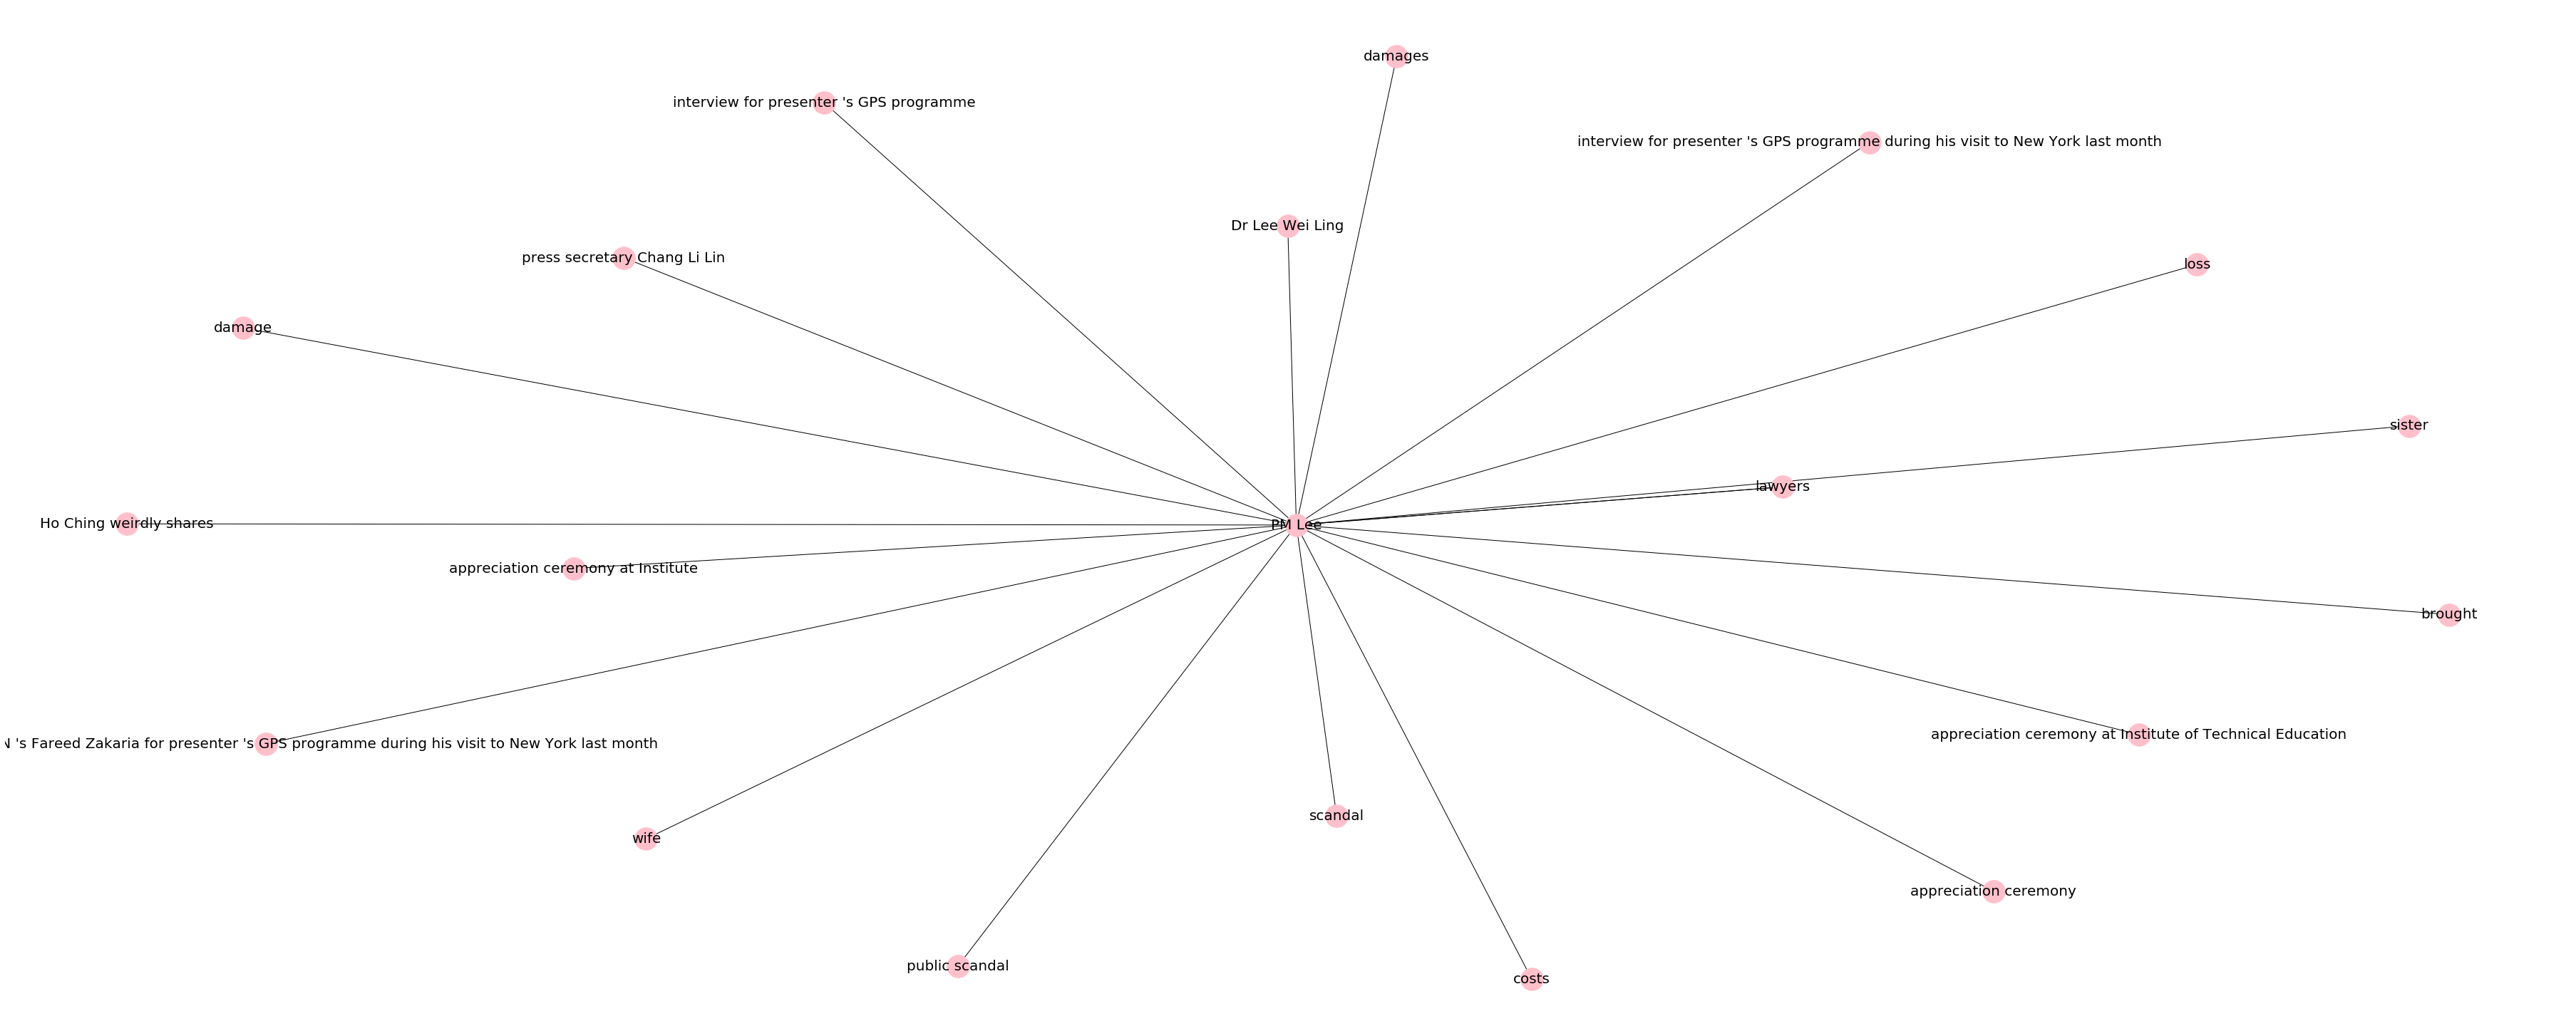

In [410]:
g=nx.MultiGraph() 
g.add_edges_from(edges[:20])

plt.figure(figsize=(50,20))

nx.draw(g, pos=nx.spring_layout(g), with_labels=True, node_size=1000, node_color='pink',font_size=20)
# circular, planar, random, spectral, spring, shell

#nx.draw_networkx_edge_labels(g,nx.spring_layout(g), edge_labels=dic) 
plt.show()

In [414]:
d = set(edges)
l = set(r['relation'])

In [415]:
lab=list(r['relation'])

In [416]:
dic = {edges[i]:lab[i] for i in range(len(r))}

In [426]:
r = rs_data.iloc[[42140,42155,42230,43704,61746,43699,114871,278014,286802,286998,325964,326993,326996,228303,228549,228667,229038]]

{('PM Lee',
  'Ho Ching weirdly shares'): Text(0.27161914958122135, 0.39723954904555997, "'s wife is"),
 ('PM Lee',
  'Dr Lee Wei Ling'): Text(-0.24702822401674918, 0.4031287488404367, "'s sister is"),
 ('PM Lee',
  'damages'): Text(-0.45193541753182925, 0.03138284313476031, 'is claiming'),
 ('PM Lee',
  'US President Donald Trump'): Text(-0.39464611302120134, -0.14218443861994773, 'met'),
 ('PM Lee',
  'opening of annual high-level security forum'): Text(-0.1781561703821715, -0.39859885748525853, 'will deliver keynote speech at'),
 ('PM Lee',
  "interview with CNN 's Fareed Zakaria for presenter 's GPS programme during his visit to New York"): Text(-0.0707518198311877, 0.4550407692675834, 'did'),
 ('PM Lee',
  'opening dinner of three-day summit'): Text(0.40642206541611253, 0.26234774874421707, 'Speaking at'),
 ('PM Lee',
  'his keynote address on Friday'): Text(0.447185340846189, -0.10035397194622263, 'is expected During'),
 ('PM Lee',
  'photos with mock-up of Scorpio EST-X1'): Text

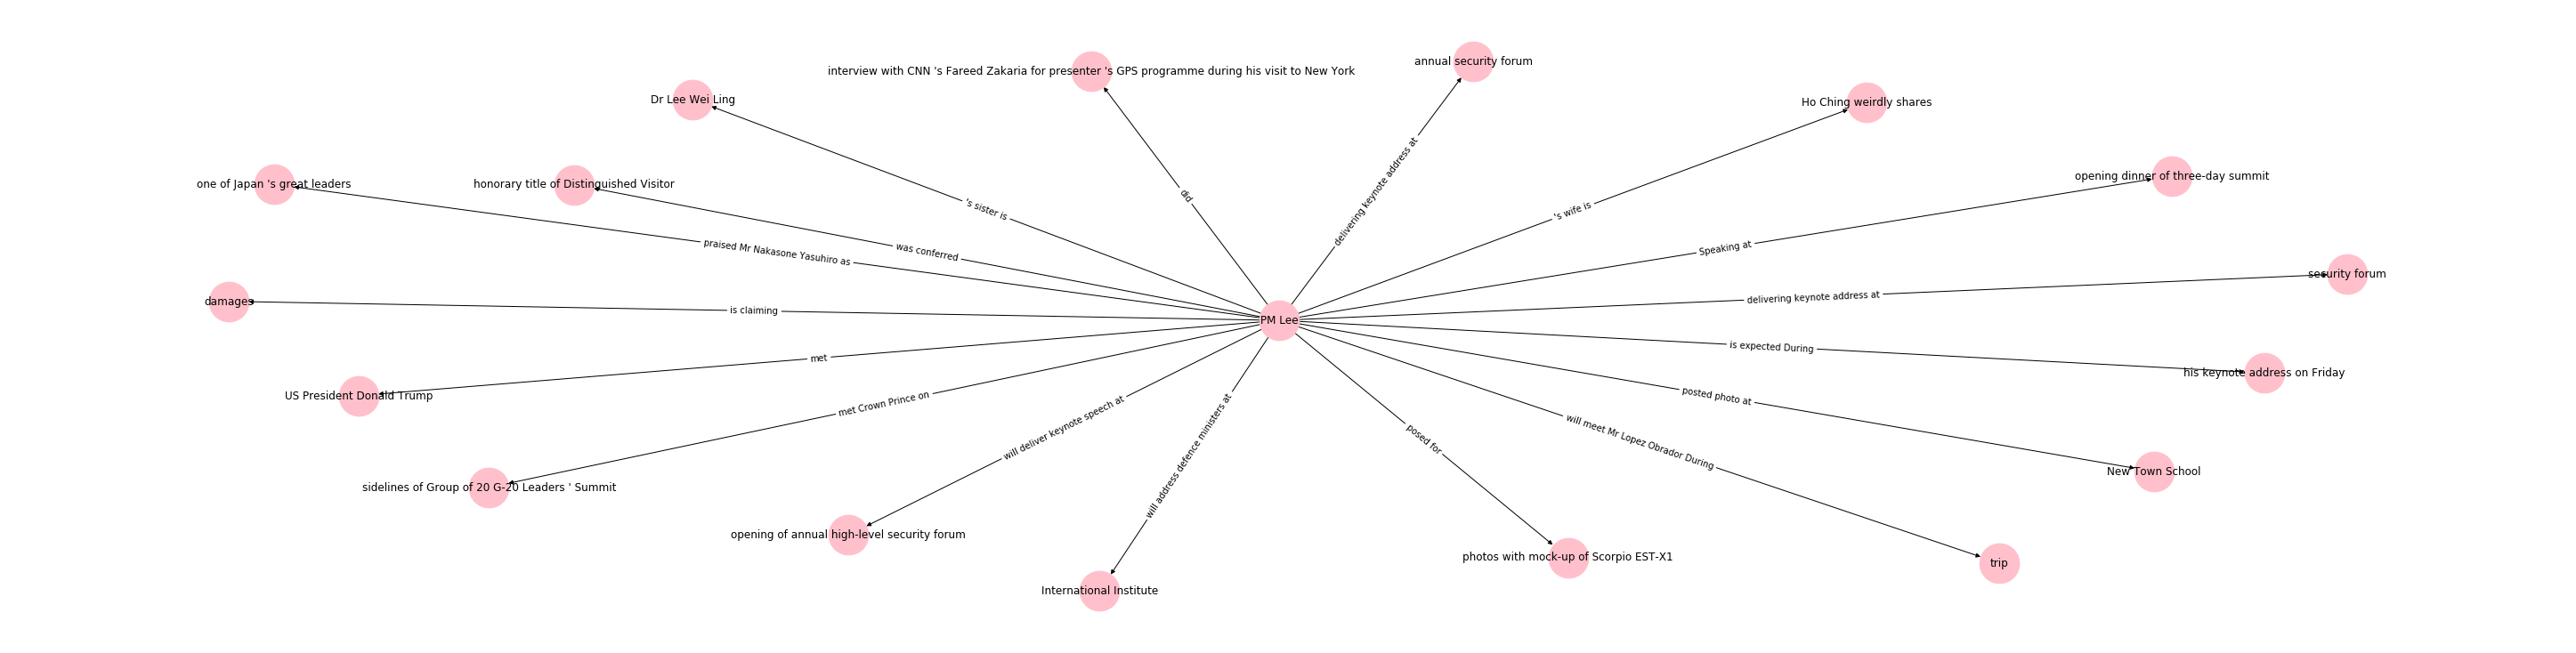

In [417]:
from matplotlib import pyplot as plt
G = nx.DiGraph() #Creates an empty Graph
G.add_edges_from(edges)

pos = nx.spring_layout(G)

plt.figure(figsize=(40,10))

nx.draw(G,pos,with_labels=True,node_color='pink', node_size=2000)
nx.draw_networkx_edge_labels(G,pos,edge_labels=dic)